In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split 

In [2]:
X, y = make_classification(n_samples = 10000, n_features = 5)

In [3]:
X = pd.DataFrame(X, columns = ['feature_' + str(i) for i in range(5)])

In [4]:
X.shape, y.shape

((10000, 5), (10000,))

In [5]:
X.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
0,-0.652986,-0.143454,-1.967694,-0.309211,0.165522
1,-0.361035,-0.839979,0.912686,1.238635,-1.174553
2,-0.881111,-0.822523,-2.493635,0.748285,-0.823498
3,-0.713732,-0.464149,0.800909,0.231578,-0.330641
4,1.227107,0.791864,1.168878,-0.386771,0.558246


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [8]:
X_train.head()

,feature_0,feature_1,feature_2,feature_3,feature_4
9942,-1.922300,0.330505,-0.063643,-2.305324,1.740280
5334,-0.548288,0.100862,1.464848,-0.669754,0.507346
1759,-1.539635,0.277206,-1.493450,-1.869564,1.414644
3203,1.331825,0.007832,-0.260594,1.158350,-0.811555
163,-2.064788,-2.077366,1.824868,2.031256,-2.179230


In [9]:
y[0]

np.int64(0)

In [10]:
pipeline = Pipeline(steps = [('scaling', StandardScaler()),
                             ('model', LogisticRegression())])

In [11]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaling', StandardScaler()), ('model', LogisticRegression())])

In [12]:
y_pred = pipeline.predict(X_test)

In [13]:
y_pred[0]

np.int64(1)

In [14]:
from sklearn.metrics import classification_report, accuracy_score

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       972
           1       0.93      0.92      0.93      1028

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



In [16]:
accuracy_score(y_test, y_pred)

0.924

In [17]:
from sklearn.metrics import roc_curve, auc


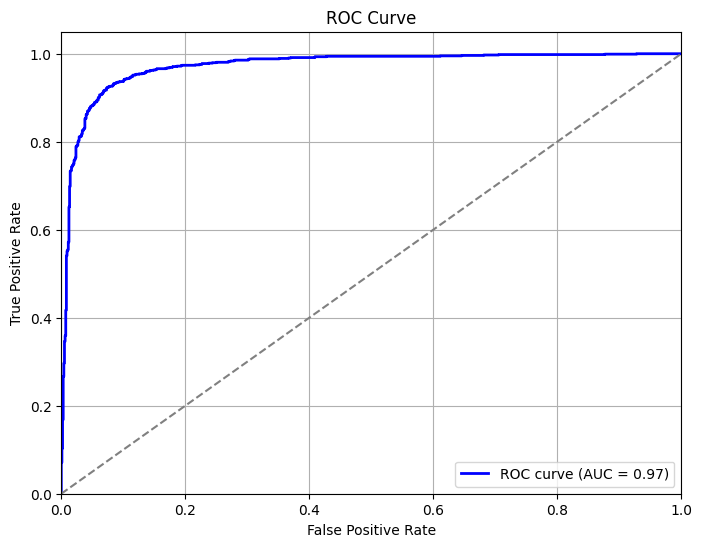

In [18]:
# Get predicted probabilities
y_probs = pipeline.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs, drop_intermediate = False)
roc_auc = auc(fpr, tpr)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

In [145]:
X_test[0]

array([-1.88825262,  0.47303461, -1.43919484,  0.95543152, -0.34464308])

In [147]:
X_test[1]

array([-0.90010376,  0.25318268,  1.43673636, -1.72511008,  0.42302945])

In [149]:
import joblib



In [151]:
# Save the pipeline to a file
joblib.dump(pipeline, "model_pipeline.pkl")


['model_pipeline.pkl']